
# Modelo Original
## XGBoost para la predicción del precio de cierre del Gas Natural

Las series de tiempo relacionadas con el precio de Gas Natural tienden a tener valores cada vez más altos, lo que indica una tendencia al alza, además de parecer estacionarios. Es decir, las propiedades estadísticas permanecen constantes en el tiempo.

Sin embargo, es vital probar estas suposiciones utilizando métodos estadísticos en lugar de confiar únicamente en observaciones visuales. La aplicación de métodos estadísticos permite una evaluación más precisa de la presencia y la naturaleza de las tendencias y la estacionariedad en las series temporales del combustible. Este enfoque garantiza la precisión y confiabilidad de los resultados obtenidos y facilita la toma de decisiones precisas e informadas basadas en  análisis de  series temporales.

**XGBoost** es una abreviación de *Extreme Gradient Boosting* y es un algoritmo de aprendizaje automático que se utiliza ampliamente  en una variedad de aplicaciones, incluido el análisis de series temporales.

En este apartado, nos enfocaremos en cómo aplicar XGBoost específicamente al modelado y pronóstico del precio de cierre del gas natural.

XGBoost es una implementación optimizada de árboles de decisión mejorados, una técnica que combina múltiples modelos  débiles para crear un modelo predictivo robusto y preciso.

Mediante un algoritmo de optimización de gradiente descendente minimiza la función de pérdida, mejorando así iterativamente la precisión del modelo.




El gráfico anterior ilustra la eficacia  del modelo predictivo a corto plazo y demuestra su capacidad para capturar con precisión  patrones y tendencias presentes en los datos. 

El modelo demostró un  poder predictivo significativo al ajustar con precisión puntos de datos reales y seguir de cerca las fluctuaciones observadas a lo largo del tiempo.

Una evaluación detallada del modelo muestra que es capaz de predecir con precisión  fluctuaciones a corto plazo en los datos y que se adapta bien a las condiciones cambiantes del mercado. Este poder predictivo se refleja en la capacidad del modelo para predecir con precisión  tendencias ascendentes y descendentes en series temporales y detectar cambios repentinos en el comportamiento de los datos.
Además, existe una notable coherencia  entre las predicciones del modelo y los valores reales, lo que respalda su capacidad para proporcionar estimaciones precisas incluso durante períodos de alta volatilidad. Esta precisión y adaptabilidad del modelo a corto plazo es importante para una toma de decisiones informada.

In [1]:
import pandas as pd
import xgboost as xgb
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Cargar datos del gas natural
gas_natural = pd.read_csv(r"C:\Users\claud\OneDrive - Universidad del Norte\Escritorio\Series de tiempo\Natural_Gas_data.csv")

# Asegúrate de que la columna 'date' esté en formato de fecha y úsala como índice
gas_natural['date'] = pd.to_datetime(gas_natural['date'])
gas_natural.set_index('date', inplace=True)

# Verificar las primeras filas y los tipos de datos
print(gas_natural.head())
print(gas_natural.dtypes)

# Asegúrate de que las columnas existan
features = ['volume', 'low']
target = 'close'

# Tratar datos faltantes
gas_natural = gas_natural.dropna(subset=features + [target])

# Prepara los datos
X = gas_natural[features]
y = gas_natural[target]

# División de los datos en 85% entrenamiento y 15% prueba
train_size = int(len(X) * 0.85)

X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Inicializar el modelo
model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.01, early_stopping_rounds=50)

# Entrenamiento del modelo
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# Predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular MAPE y RMSE
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"MAPE Entrenamiento: {mape_train:.4f}")
print(f"MAPE Prueba: {mape_test:.4f}")
print(f"RMSE Entrenamiento: {rmse_train:.4f}")
print(f"RMSE Prueba: {rmse_test:.4f}")

# Graficar las predicciones y los valores reales
fig = go.Figure()

# Añadir la traza de los valores reales de entrenamiento
fig.add_trace(go.Scatter(
    x=y_train.index,
    y=y_train,
    mode='lines',
    name='Valores Reales (Entrenamiento)',
    line=dict(color='green')
))

# Añadir la traza de las predicciones de entrenamiento
fig.add_trace(go.Scatter(
    x=y_train.index,
    y=y_train_pred,
    mode='lines+markers',
    name='Predicciones (Entrenamiento)',
    line=dict(dash='dash', color='green')
))

# Añadir la traza de los valores reales de prueba
fig.add_trace(go.Scatter(
    x=y_test.index,
    y=y_test,
    mode='lines',
    name='Valores Reales (Prueba)',
    line=dict(color='blue')
))

# Añadir la traza de las predicciones de prueba
fig.add_trace(go.Scatter(
    x=y_test.index,
    y=y_test_pred,
    mode='lines+markers',
    name='Predicciones (Prueba)',
    line=dict(dash='dash', color='red')
))

# Actualizar layout
fig.update_layout(
    title='Predicciones vs Valores Reales para el Gas Natural',
    xaxis_title='Fecha',
    yaxis_title='Precio de Cierre',
    legend=dict(x=0, y=1.2, orientation='h'),
    template='plotly_white'
)

# Mostrar la figura
fig.show()


            open   high   low  close  volume
date                                        
2000-08-30  4.65  4.815  4.63  4.805   34954
2000-08-31  4.82  4.870  4.74  4.780   25787
2000-09-01  4.75  4.860  4.75  4.835     113
2000-09-05  4.85  4.975  4.84  4.960   26096
2000-09-06  4.99  5.110  4.96  5.065   32764
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object
MAPE Entrenamiento: 0.0127
MAPE Prueba: 0.0181
RMSE Entrenamiento: 0.0920
RMSE Prueba: 0.1364


In [2]:
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import acorr_ljungbox, het_breuschpagan
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

def check_model_assumptions(residuals, title):
    print(f"\n--- Validación de Supuestos para {title} ---")

    # 1. Prueba de Normalidad (Shapiro-Wilk)
    stat, p_value = shapiro(residuals)
    print(f"Shapiro-Wilk p-value: {p_value:.4f}")
    if p_value < 0.05:
        print("Conclusión: Los residuales NO siguen una distribución normal.\n")
    else:
        print("Conclusión: Los residuales siguen una distribución normal.\n")

    # 2. Prueba de Autocorrelación (Ljung-Box)
    lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
    lb_p_value = lb_test['lb_pvalue'].values[0]
    print(f"Ljung-Box p-value: {lb_p_value:.4f}")
    if lb_p_value < 0.05:
        print("Conclusión: Hay autocorrelación significativa en los residuales.\n")
    else:
        print("Conclusión: No hay autocorrelación significativa en los residuales.\n")

    # 3. Prueba de Homocedasticidad (Breusch-Pagan)
    exog = sm.add_constant(np.arange(len(residuals)).reshape(-1, 1))
    _, bp_p_value, _, _ = het_breuschpagan(residuals, exog)
    print(f"Breusch-Pagan p-value: {bp_p_value:.4f}")
    if bp_p_value < 0.05:
        print("Conclusión: No hay homocedasticidad (varianza no constante).\n")
    else:
        print("Conclusión: Hay homocedasticidad (varianza constante).\n")

    # Graficar los residuales
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.hist(residuals, bins=20, edgecolor='black')
    plt.title('Histograma de Residuales')

    plt.subplot(1, 3, 2)
    sm.qqplot(residuals, line='s', ax=plt.gca())
    plt.title('Q-Q Plot')

    plt.subplot(1, 3, 3)
    plot_acf(residuals, lags=30, ax=plt.gca())
    plt.title('ACF de Residuales')

    plt.tight_layout()
    plt.show()



--- Validación de Supuestos para Entrenamiento ---
Shapiro-Wilk p-value: 0.0000
Conclusión: Los residuales NO siguen una distribución normal.

Ljung-Box p-value: 0.0000
Conclusión: Hay autocorrelación significativa en los residuales.

Breusch-Pagan p-value: 0.0000
Conclusión: No hay homocedasticidad (varianza no constante).



c:\Users\claud\anaconda3\envs\ml_venv\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



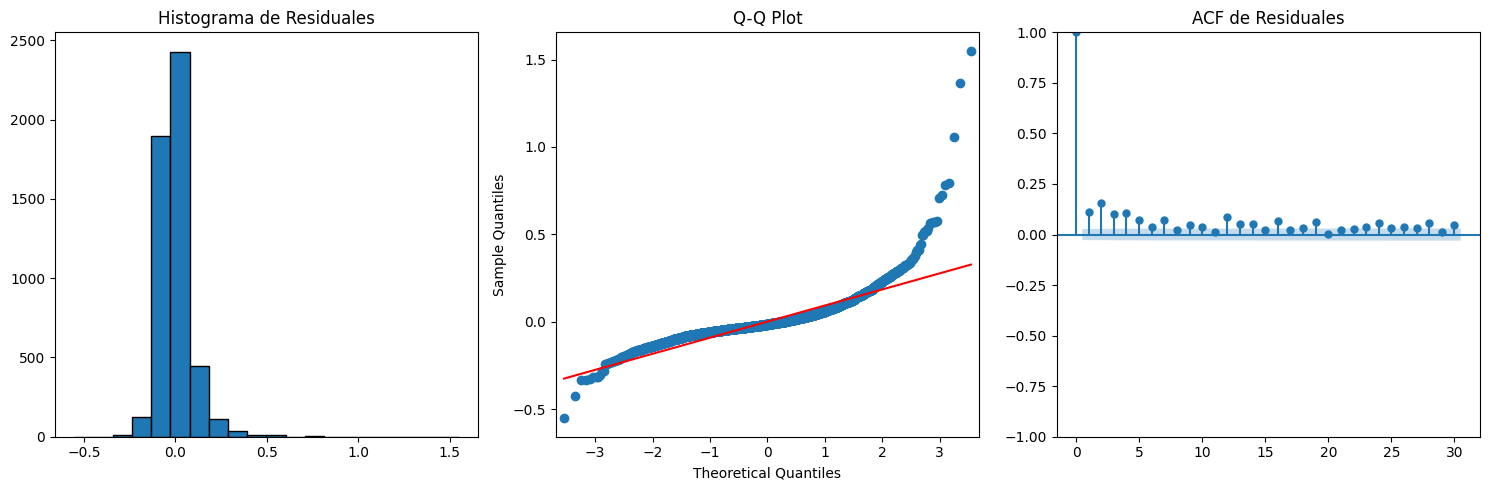


--- Validación de Supuestos para Prueba ---
Shapiro-Wilk p-value: 0.0000
Conclusión: Los residuales NO siguen una distribución normal.

Ljung-Box p-value: 0.0009
Conclusión: Hay autocorrelación significativa en los residuales.

Breusch-Pagan p-value: 0.2610
Conclusión: Hay homocedasticidad (varianza constante).



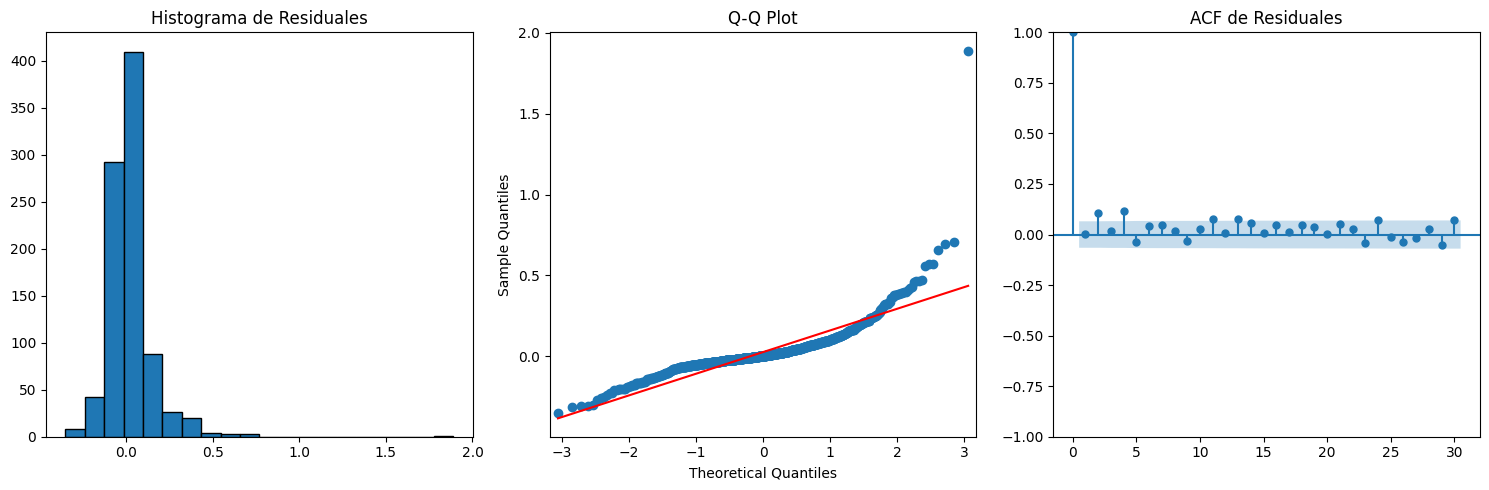

In [4]:
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

check_model_assumptions(residuals_train, 'Entrenamiento')
check_model_assumptions(residuals_test, 'Prueba')